In [1]:
import pickle
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model, save_model
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import pickle
import pandas as pd

In [2]:
img_size = (256, 256)

In [3]:
test_dir = 'C:/Users/hp/Desktop/BE_Project_Dataset/testing_dataset'
test_csv_path ='C:/Users/hp/Desktop/BE_Project_Dataset/test.csv'

In [4]:
test_df = pd.read_csv(test_csv_path)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=test_dir,
    x_col='Image Name',
    y_col='Class',
    target_size=img_size,
    class_mode='categorical',
    shuffle=False
)

Found 109 validated image filenames belonging to 3 classes.


In [6]:
model_pkl_file = "final_cnn_model.pkl"
with open(model_pkl_file,"rb") as file:
    model = pickle.load(file)

In [8]:
true_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    batch_data, batch_labels = test_generator[i]
    batch_pred_labels = model.predict(batch_data) 
    predicted_labels.extend(batch_pred_labels)
    true_labels.extend(batch_labels)
    
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

1/1 [==============================] - 0s 125ms/step


In [9]:
evaluation = model.evaluate(test_generator)

accuracy = evaluation[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4/4 [==============================] - 1s 108ms/step - loss: 0.0161 - accuracy: 0.9908
Test Accuracy: 99.08%


In [32]:
conf_matrix = confusion_matrix(true_labels.argmax(axis=1), predicted_labels.argmax(axis=1))

<AxesSubplot:>

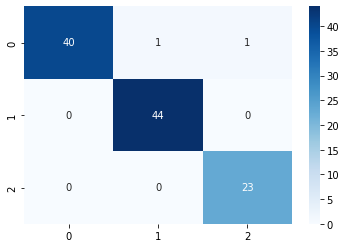

In [36]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')